# ✈️ Airline Passenger Satisfaction Prediction
## 📊 EDA and Model Development

In [58]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Get data

In [59]:
# Load data
print("🛫 Loading dataset...")
df = pd.read_csv('Data/airline_passengers_satisfaction.csv')
print(f"Dataset shape: {df.shape}")

# Basic info
print("\n📋 Dataset Info:")
print("=" * 40)
print(df.info())

print("\n🔍 Missing Values:")
print("=" * 40)
print(df.isnull().sum())


🛫 Loading dataset...
Dataset shape: (103904, 25)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103

In [60]:
# Display first few rows
print("📊 First 5 rows:")
df.head()

📊 First 5 rows:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2. Data Cleaning

In [61]:
# Data cleaning
print("🧹 Cleaning data...")
df = df.copy()

🧹 Cleaning data...


In [62]:
# Remove the first column (Unnamed: 0)
df = df.drop(columns=['Unnamed: 0'])

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# Handle missing values
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(0)
df = df.dropna()

print(f"✅ Cleaned dataset shape: {df.shape}")

✅ Cleaned dataset shape: (103904, 24)


In [63]:
df.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
gender,male,male,female,female,male
customer_type,loyal_customer,disloyal_customer,loyal_customer,loyal_customer,loyal_customer
age,13,25,26,25,61
type_of_travel,personal_travel,business_travel,business_travel,business_travel,business_travel
class,eco_plus,business,business,business,business
flight_distance,460,235,1142,562,214
inflight_wifi_service,3,3,2,2,3
departure/arrival_time_convenient,4,2,2,5,3
ease_of_online_booking,3,3,2,5,3


In [64]:
# Convert satisfaction to binary (1 = satisfied, 0 = neutral/dissatisfied)
df.satisfaction = (df.satisfaction == 'satisfied').astype(int)

## 3. Split Dataset

In [65]:
# Split the data into training, validation, and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Print the sizes of each dataset
len(df_train), len(df_val), len(df_test)

(62342, 20781, 20781)

In [66]:
# Reset the index for all split datasets to avoid index conflicts
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
# Extract target variable (y) from each dataset
y_train = df_train.satisfaction.values
y_val = df_val.satisfaction.values
y_test = df_test.satisfaction.values

# Remove the target column from feature sets
del df_train['satisfaction']
del df_val['satisfaction']
del df_test['satisfaction']

## 4. EDA

In [68]:
df_full_train.dtypes

id                                     int64
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
inflight_wifi_service                  int64
departure/arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_de

In [69]:
# Define numerical and categorical features
print("🔧 Defining feature types...")

# Numerical features
numerical_features = [
     'age', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# Categorical features
categorical_features = [
    'gender', 'customer_type', 'type_of_travel', 'class'
]

# Target variable
target_feature = 'satisfaction'

print("📊 Feature Summary:")
print("=" * 50)
print(f"Total features: {len(numerical_features) + len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Target: {target_feature}")

🔧 Defining feature types...
📊 Feature Summary:
Total features: 22
Numerical features: 18
Categorical features: 4
Target: satisfaction


In [70]:
# Numerical features analysis
df_full_train[numerical_features].describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,15.017637
std,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,38.426241
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


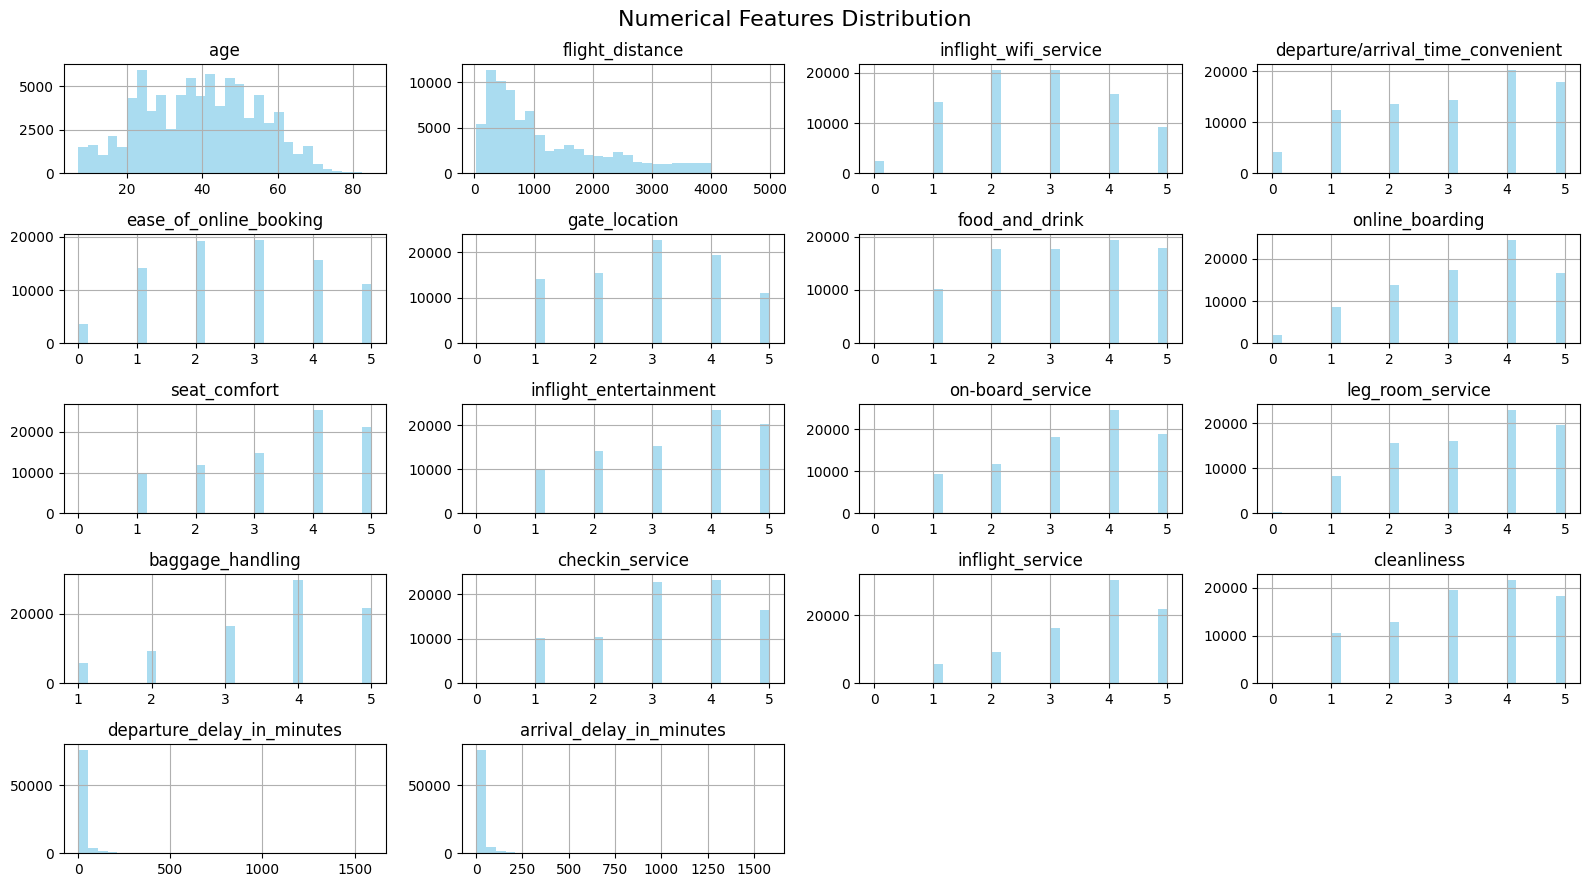

In [71]:
# Numerical features distributions
df_full_train[numerical_features].hist(bins=30, figsize=(16, 9), color='skyblue', alpha=0.7)
plt.suptitle('Numerical Features Distribution', fontsize=16)
plt.tight_layout()
plt.show()


🎯 Target Variable Distribution:
satisfaction
0    47004
1    36119
Name: count, dtype: int64

Percentage:
satisfaction
0    56.5
1    43.5
Name: count, dtype: float64


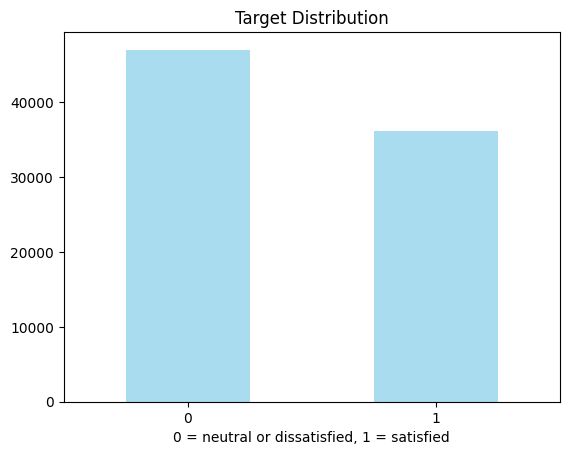

In [72]:
# Target variable analysis
print("\n🎯 Target Variable Distribution:")
print("=" * 40)
target_counts = df_full_train['satisfaction'].value_counts()
print(target_counts)
print(f"\nPercentage:\n{(target_counts / len(df_full_train) * 100).round(1)}")

# Target distribution plot
df_full_train.satisfaction.value_counts().plot(kind='bar', title='Target Distribution', color='skyblue', alpha=0.7)
plt.xticks(rotation=0) 
plt.xlabel('0 = neutral or dissatisfied, 1 = satisfied')
plt.show()

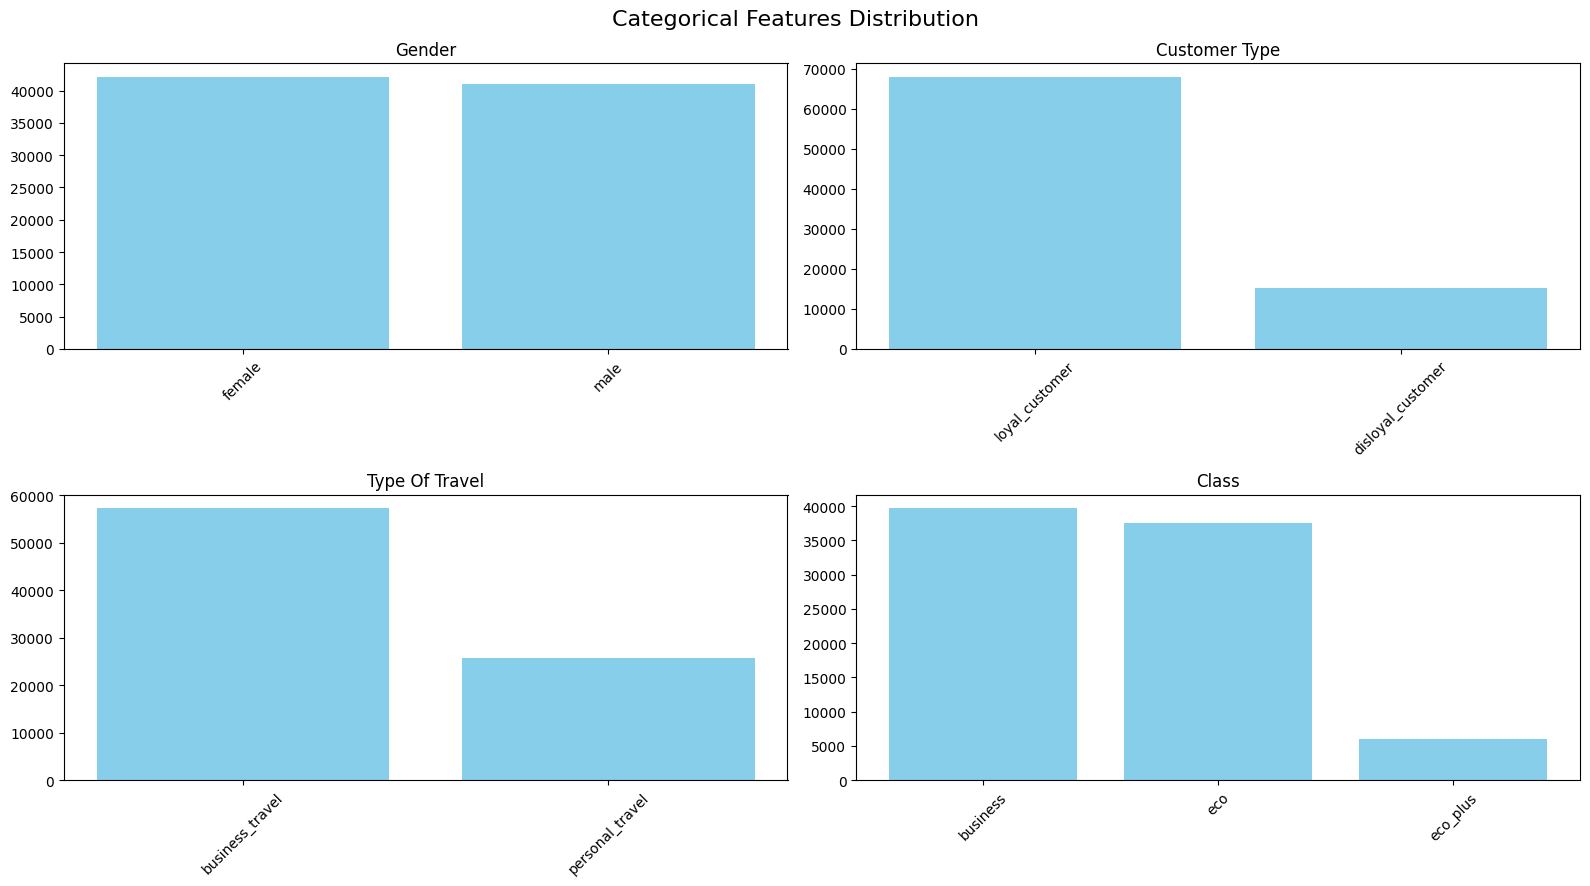

In [73]:
# Categorical features - shortest version
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

for i, col in enumerate(categorical_features):
    ax = axes.flat[i]
    counts = df_full_train[col].value_counts()
    ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xticklabels(counts.index, rotation=45)
    
plt.suptitle('Categorical Features Distribution', fontsize=16)
plt.tight_layout()
plt.show()

### Feature Importance: Satisfaction Rate and Risk Ratio

In [74]:
global_satisfaction = df_full_train.satisfaction.mean()
for c in categorical_features:
    print(c)
    df_group = df_full_train.groupby(c).satisfaction.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_satisfaction
    df_group['risk'] = df_group['mean'] / global_satisfaction
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.428758,42117,-0.005767,0.986729
male,0.440448,41006,0.005923,1.013631




customer_type


,mean,count,diff,risk
customer_type,,,,
disloyal_customer,0.239282,15208,-0.195243,0.550675
loyal_customer,0.478245,67915,0.043720,1.100616




type_of_travel


,mean,count,diff,risk
type_of_travel,,,,
business_travel,0.584034,57310,0.149509,1.344076
personal_travel,0.102584,25813,-0.331941,0.236083




class


,mean,count,diff,risk
class,,,,
business,0.695321,39691,0.260797,1.600188
eco,0.187575,37457,-0.246950,0.431679
eco_plus,0.250209,5975,-0.184316,0.575823


### Feature Importance: Correlation

In [75]:
df_full_train[numerical_features].corrwith(df_full_train.satisfaction).sort_values()

arrival_delay_in_minutes            -0.056568
departure/arrival_time_convenient   -0.052563
departure_delay_in_minutes          -0.049321
gate_location                        0.000922
age                                  0.136977
ease_of_online_booking               0.173212
food_and_drink                       0.209106
checkin_service                      0.233792
inflight_service                     0.244100
baggage_handling                     0.244468
inflight_wifi_service                0.284496
flight_distance                      0.301113
cleanliness                          0.303931
leg_room_service                     0.310589
on-board_service                     0.321413
seat_comfort                         0.344462
inflight_entertainment               0.394550
online_boarding                      0.504342
dtype: float64

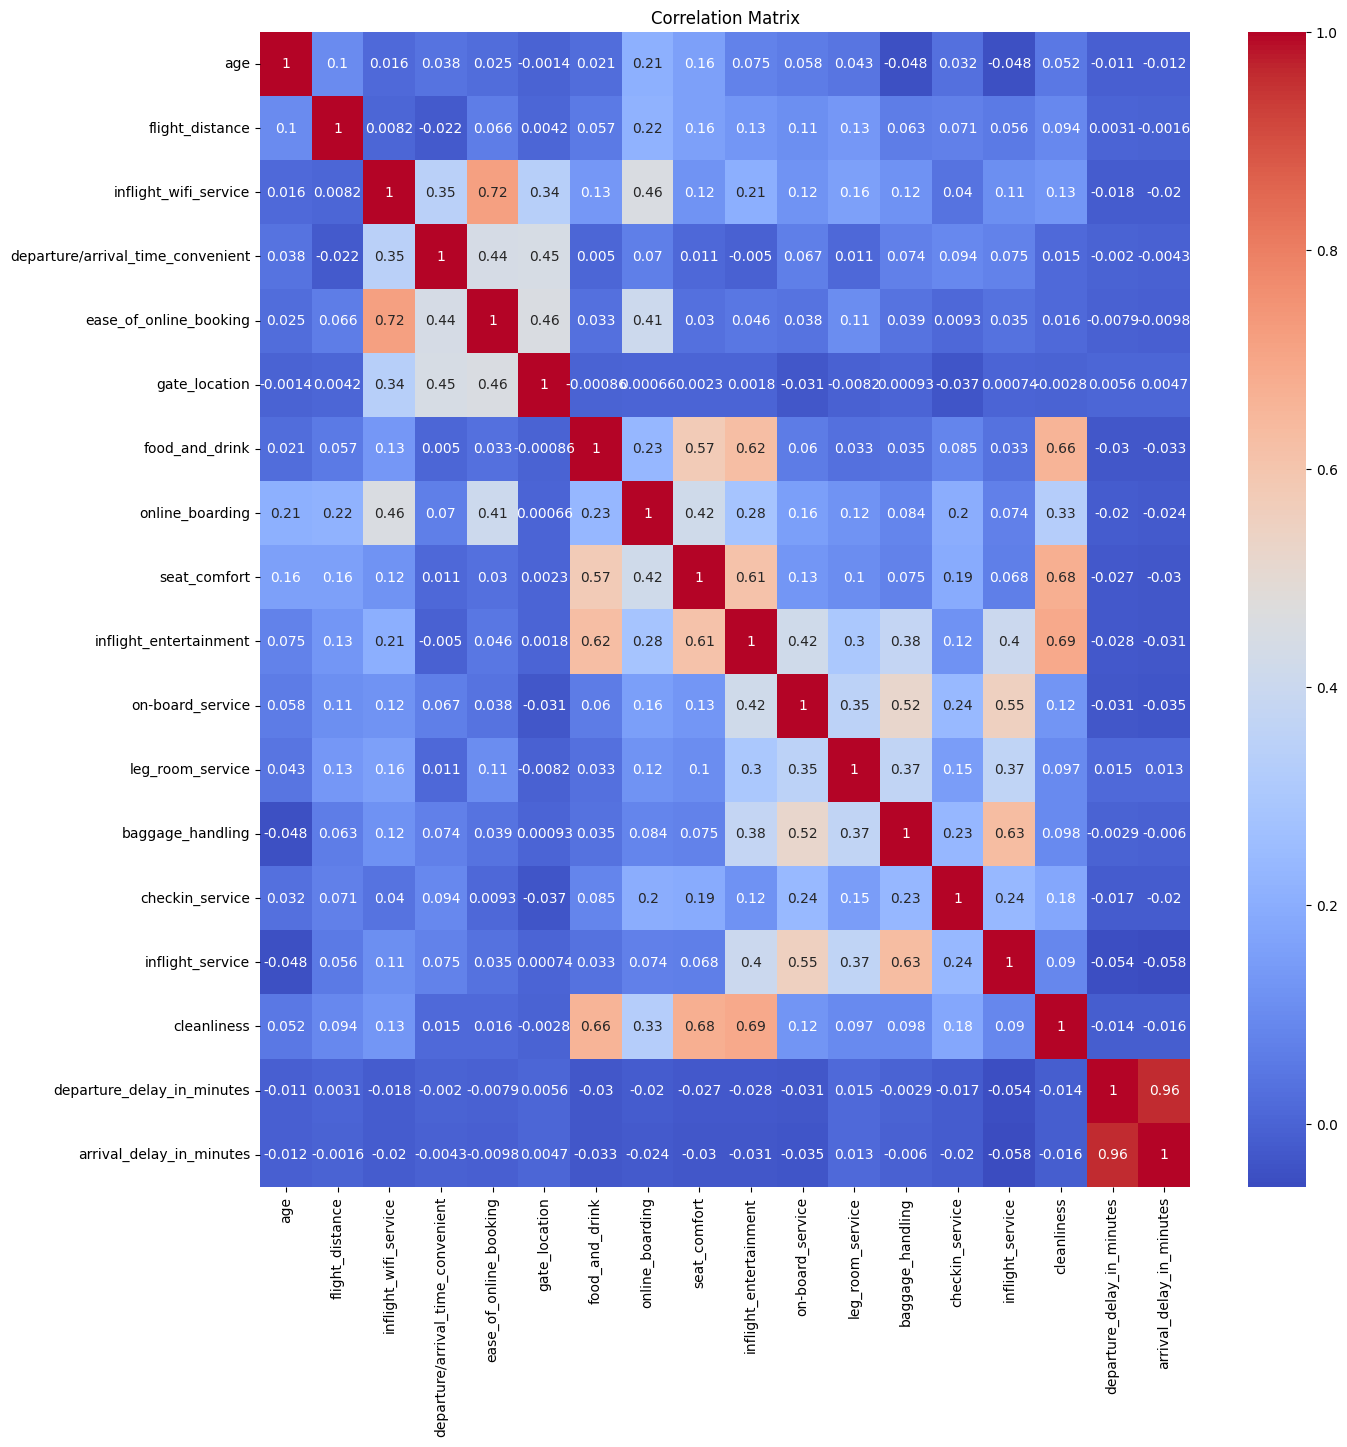

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(df_full_train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4. One-hot Encoding

In [88]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_features + numerical_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)
test_dict = df_test[categorical_features + numerical_features].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [78]:
# Column names after one-hot encoding
print(f"Features: {dv.get_feature_names_out()}")
     

Features: ['age' 'arrival_delay_in_minutes' 'baggage_handling' 'checkin_service'
 'class=business' 'class=eco' 'class=eco_plus' 'cleanliness'
 'customer_type=disloyal_customer' 'customer_type=loyal_customer'
 'departure/arrival_time_convenient' 'departure_delay_in_minutes'
 'ease_of_online_booking' 'flight_distance' 'food_and_drink'
 'gate_location' 'gender=female' 'gender=male' 'inflight_entertainment'
 'inflight_service' 'inflight_wifi_service' 'leg_room_service'
 'on-board_service' 'online_boarding' 'seat_comfort'
 'type_of_travel=business_travel' 'type_of_travel=personal_travel']


## 5. Models

In [79]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

print(f"🔧 {len(models)} models ready for comparison:")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

🔧 3 models ready for comparison:
1. Logistic Regression
2. Decision Tree
3. Random Forest


In [94]:
# Train and evaluate models
results = []

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'AUC': roc_auc_score(y_val, y_pred_proba),
        'model_object': model
    }
    
    results.append(metrics)
    print(f"   Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   AUC: {metrics['AUC']:.4f}")

# Results table
results_df = pd.DataFrame(results).sort_values('AUC', ascending=False)
print("\n📋 Results:")
print("=" * 60)
print(results_df[['Model', 'Accuracy', 'F1', 'AUC']].round(4))


🚀 Training Logistic Regression...
   Accuracy: 0.8755
   AUC: 0.9276

🚀 Training Decision Tree...
   Accuracy: 0.9095
   AUC: 0.9686

🚀 Training Random Forest...
   Accuracy: 0.9632
   AUC: 0.9936

📋 Results:
                 Model  Accuracy      F1     AUC
2        Random Forest    0.9632  0.9576  0.9936
1        Decision Tree    0.9095  0.8953  0.9686
0  Logistic Regression    0.8755  0.8556  0.9276


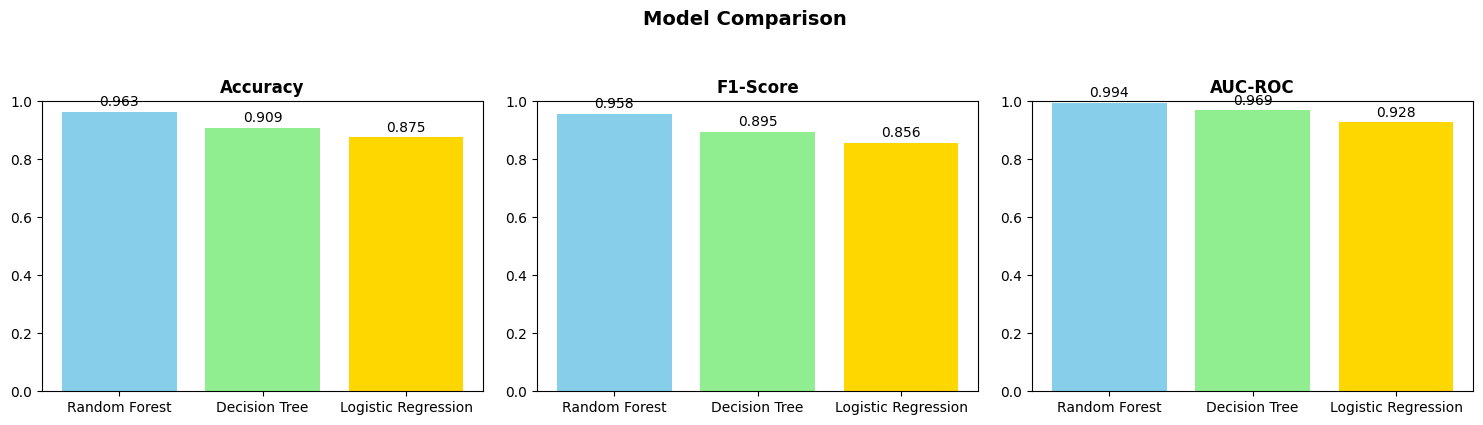

In [95]:
# Select best model
best_idx = results_df['AUC'].idxmax()
best_name = results_df.loc[best_idx, 'Model']
best_model = results_df.loc[best_idx, 'model_object']

print(f"🏆 Best Model: {best_name}")
print(f"   F1-Score: {results_df.loc[best_idx, 'F1']:.4f}")
print(f"   Accuracy: {results_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"   AUC-ROC: {results_df.loc[best_idx, 'AUC']:.4f}")

🏆 Best Model: Random Forest
   F1-Score: 0.9576
   Accuracy: 0.9632
   AUC-ROC: 0.9936


In [96]:
# Random Forest Test Set Results
print("📊 Random Forest - Test Set")
print("=" * 40)

# Test set predictions
X_test = dv.transform(df_test[categorical_features + numerical_features].to_dict('records'))
y_pred = models['Random Forest'].predict(X_test)

# Results
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")
print(f"AUC-ROC :  {f1_score(y_test, y_pred):.3f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Random Forest - Test Set
Accuracy:  0.961
F1-Score:  0.954

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11875
           1       0.97      0.94      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [85]:
# Save model
import pickle

model_to_save = {
    'model': best_model,
    'vectorizer': dv,
    'features': categorical_features + numerical_features,
    'performance': results_df.loc[best_idx].to_dict()
}

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model_to_save, f)

print(f"💾 Model saved: best_model.pkl ({best_name})")

💾 Model saved: best_model.pkl (Random Forest)


In [90]:
# Random Forest Test Set Results
print("📊 Random Forest - Test Set")
print("=" * 40)

# Test set predictions
y_pred = models['Random Forest'].predict(X_test)

# Results
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")

roc_auc_score
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Random Forest - Test Set
Accuracy:  0.961
F1-Score:  0.954

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11875
           1       0.97      0.94      0.95      8906

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

